In [1]:
import torch
import numpy as np

### RNN basics

In [ ]:
input_size = 4
hidden_size = 2

# One-Hot Encoding
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]
input_data_np = np.array([[h, e, l, l, o], 
						  [e, o, l, l, l], 
						  [l, l, e, e, l]], dtype=np.float32)
input_data = torch.Tensor(input_data_np)

rnn = torch.nn.RNN(input_size, hidden_size)
outputs, _status = rnn(input_data)

### RNN hihello 

In [7]:
### hihello
char_set = ["h", "i", "e", "l", "o"]

# hyper params
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

# data setting
x_data = [[0, 1, 0, 2, 3, 3]]
x_one_hot = [[[1, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0], 
              [1, 0, 0, 0, 0], 
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0], 
              [0, 0, 0, 1, 0]]]
y_data = [[1, 0, 2, 3, 3, 4]]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

### RNN charseq

In [24]:
### charseq
sample = " if you want you"

# make dictionary
char_set = list(set(sample))
char_dic = {c: i for i, c in enumerate(char_set)}

# hyper params
dic_size = len(char_dic)
input_size = len(char_dic)
hidden_size = len(char_dic)
learning_rate = 0.1


# data setting
sample_idx = [char_dic[c] for c in sample]
x_data = [sample_idx[:-1]]
x_one_hot = [np.eye(dic_size)[x] for x in x_data]
y_data = [sample_idx[1:]]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)


# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # batch_first guarantees the order of output = (B, S, F)

# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn.parameters(), learning_rate)

# start training
for i in range(100):
    optimizer.zero_grad()
    outputs, _status = rnn(X)
    
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()
    
    result = outputs.data.numpy().argmax(axis=2)
    result_str = "".join([char_set[c] for c in np.squeeze(result)])
    print(f"Training {i}") 
    print("     loss:           ", loss.item())
    print("     prediction:     ", result) 
    print("     true Y:         ", y_data)
    print("     prediction str: ", result_str)

Training 0
     loss:            2.4721407890319824
     prediction:      [[2 2 3 2 3 3 2 3 3 3 2 2 3 3 3]]
     true Y:          [[4, 0, 1, 8, 5, 2, 1, 6, 7, 9, 3, 1, 8, 5, 2]]
     prediction str:  uututtutttuuttt
Training 1
     loss:            2.1711106300354004
     prediction:      [[4 5 2 4 5 2 8 4 4 8 8 9 4 5 2]]
     true Y:          [[4, 0, 1, 8, 5, 2, 1, 6, 7, 9, 3, 1, 8, 5, 2]]
     prediction str:  iouiouyiiyyniou
Training 2
     loss:            1.9528337717056274
     prediction:      [[8 5 1 1 5 2 1 1 1 1 1 1 1 5 2]]
     true Y:          [[4, 0, 1, 8, 5, 2, 1, 6, 7, 9, 3, 1, 8, 5, 2]]
     prediction str:  yo  ou       ou
Training 3
     loss:            1.8191578388214111
     prediction:      [[1 5 1 1 5 2 1 5 7 1 1 1 1 5 2]]
     true Y:          [[4, 0, 1, 8, 5, 2, 1, 6, 7, 9, 3, 1, 8, 5, 2]]
     prediction str:   o  ou oa    ou
Training 4
     loss:            1.6708742380142212
     prediction:      [[8 5 1 1 5 2 1 1 1 1 1 1 1 5 2]]
     true Y:          [[4, 0

### RNN longseq

In [2]:
sentence = ("if you want to bulid a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.")

# make dictionary
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

# hyper params
dic_size = len(char_dic)
input_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10 # window
learning_rate = 0.1

# data setting
x_data = []
y_data = []

for i in range(0, len(sentence)-sequence_length):
    x_str = sentence[i : i+sequence_length]
    y_str = sentence[i+1 : i+sequence_length+1]
    
    # print(i, x_str, "->", y_str)
    
    x_data.append([char_dic[c] for c in x_str]) # x_str to index
    y_data.append([char_dic[c] for c in y_str]) # y_str to index
    
x_one_hot = [np.eye(dic_size)[x] for x in x_data]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data) 

# declare RNN + FC 
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(
            input_dim, 
            hidden_dim, 
            num_layers=layers, 
            batch_first=True
            )
        self.fc = torch.nn.Linear(
            hidden_dim, 
            hidden_dim, 
            bias=True
            )
    
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

net = Net(dic_size, hidden_size, 2)

# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), learning_rate)

# start training
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()
    
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        print(i, j, "".join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += "".join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]
            
    # print(f"Training {i}") 
    # print("     loss:           ", loss.item())
    # print("     prediction:     ", result) 
    # print("     true Y:         ", y_data)
    # print("     prediction str: ", result_str)

C:\Users\ghckd\AppData\Local\Temp\ipykernel_7604\3926825224.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\b\abs_abjetg6_iu\croot\pytorch_1686932924616\work\torch\csrc\utils\tensor_new.cpp:248.)
  X = torch.FloatTensor(x_one_hot)


0 0 uccucuccuc 3.2202608585357666
0 1 ccucuccucc 3.2202608585357666
0 2 cucuccuccc 3.2202608585357666
0 3 ucuccucccc 3.2202608585357666
0 4 uucccccccc 3.2202608585357666
0 5 uccccccccc 3.2202608585357666
0 6 cccccccccc 3.2202608585357666
0 7 uccccccccu 3.2202608585357666
0 8 ucccccccuu 3.2202608585357666
0 9 cccccccuuu 3.2202608585357666
0 10 ucccccuuuc 3.2202608585357666
0 11 cucccuuucc 3.2202608585357666
0 12 ucccuuuccu 3.2202608585357666
0 13 uccuuuccuc 3.2202608585357666
0 14 ccuuuccucu 3.2202608585357666
0 15 cuuuccucuc 3.2202608585357666
0 16 uuuccucucu 3.2202608585357666
0 17 uuccucucuc 3.2202608585357666
0 18 uccucucucc 3.2202608585357666
0 19 ucccucuccc 3.2202608585357666
0 20 cccucucccc 3.2202608585357666
0 21 ucucuccccc 3.2202608585357666
0 22 cucucccccc 3.2202608585357666
0 23 ucuccccccc 3.2202608585357666
0 24 uucccccccu 3.2202608585357666
0 25 ucccccccuc 3.2202608585357666
0 26 uccccccucc 3.2202608585357666
0 27 ccccccuccc 3.2202608585357666
0 28 cucccucccc 3.220260858535

### RNN for Time Series Data

In [52]:
import torch
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

def bulid_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series)-seq_length):
        _x = time_series[i:i+seq_length, :]
        _y = time_series[i+seq_length, [-1]]
        # print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    
    return np.array(dataX), np.array(dataY)
        
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500


xy = pd.read_csv("./data_5931_20231204.csv", encoding="cp949")
xy = xy[["시가", "고가", "저가", "거래량", "종가"]].to_numpy()
xy = xy[::-1]
xy
train_size = int(len(xy)*0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = bulid_dataset(train_set, seq_length)
testX, testY = bulid_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)
        
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x
    
net = Net(data_dim, hidden_dim, output_dim, 1)

# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# start training
for i in range(iterations):
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    
    print(i, loss.item())

0 0.23097752034664154
1 0.18290042877197266
2 0.14736919105052948
3 0.12009651213884354
4 0.09821153432130814
5 0.08000671863555908
6 0.0646769180893898
7 0.05207238346338272
8 0.042486343532800674
9 0.036427974700927734
10 0.034271612763404846
11 0.035661064088344574
12 0.03897491469979286
13 0.04185962677001953
14 0.04248996451497078
15 0.04036489874124527
16 0.03618520870804787
17 0.031167244538664818
18 0.02639288827776909
19 0.02247988060116768
20 0.01956394501030445
21 0.01745607703924179
22 0.015827229246497154
23 0.01434108056128025
24 0.012733562849462032
25 0.01086521428078413
26 0.00875815562903881
27 0.0066073862835764885
28 0.004742093849927187
29 0.003514593467116356
30 0.003121825633570552
31 0.003433403093367815
32 0.003995484672486782
33 0.004324538633227348
34 0.004259954672306776
35 0.004005057737231255
36 0.0038660860154777765
37 0.003979145549237728
38 0.004234998021274805
39 0.004407695960253477
40 0.004335585981607437
41 0.004008084069937468
42 0.0035383249633014

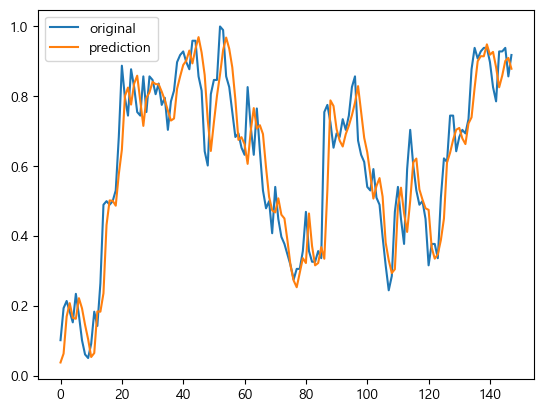

In [53]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(["original", "prediction"])
plt.show()

### RNN - Seq2Seq

In [64]:
import random
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 번역 Source text(영어) -> Target text(한국어)
raw = ["I feel hungry.	나는 배가 고프다.",
       "Pytorch is very easy.	파이토치는 매우 쉽다.",
       "Pytorch is a framework for deep learning.	파이토치는 딥러닝을 위한 프레임워크이다.",
       "Pytorch is very clear to use.	파이토치는 사용하기 매우 직관적이다."]



SOS_token = 0 # start of sentence
EOS_token = 1 # end of sentence

class Vocab:
    def __init__(self):
        self.vocab2index = {"<SOS>": SOS_token, "<EOS>": EOS_token}
        self.index2vocab = {SOS_token: "<SOS>", EOS_token: "<EOS>"}
        self.vocab_count = {}
        self.n_vocab = len(self.vocab2index)

    def add_vocab(self, sentence):
        for word in sentence.split(" "):
            if word not in self.vocab2index:
                self.vocab2index[word] = self.n_vocab
                self.vocab_count[word] = 1
                self.index2vocab[self.n_vocab] = word
                self.n_vocab += 1
            else:
                self.vocab_count[word] += 1
                
def filter_pair(pair, source_max_length, target_max_length):
    return len(pair[0].split(" ")) < source_max_length and len(pair[1].split(" ")) < target_max_length

def preprocess(corpus, source_max_length, target_max_length):
    print("reading corpus...")
    pairs = []
    for line in corpus:
        pairs.append([s for s in line.strip().lower().split("\t")]) ## tap
    print(f"Read {len(pairs)} sentence")
    
    pairs = [pair for pair in pairs if filter_pair(pair, source_max_length, target_max_length)]
    print(f"Trimmed to {len(pairs)} sentence pairs")
    
    source_vocab = Vocab()
    target_vocab = Vocab()
    
    print("Counting words...")
    for pair in pairs:
        source_vocab.add_vocab(pair[0])
        target_vocab.add_vocab(pair[1])
    print("source vocab size =", source_vocab.n_vocab)
    print("target vocab size =", target_vocab.n_vocab)
    
    return pairs, source_vocab, target_vocab

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size) #임베딩 레이어 : 텍스트를 밀집 벡터로 만드는 레이어
        self.gru = nn.GRU(hidden_size, hidden_size) #GRU 레이어 : RNN 레이어의 대체. 더 효율 좋음.

    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        return x, hidden
    
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size) #Encoder와의 차이점. 압축했던 밀집 벡터를 다시 텍스트로 복원한다 .
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        x = self.softmax(self.out(x[0]))
        return x, hidden

#sentence를 입력받아 one-hot encoding해서 pytorch tensor로 바꿔준다.
def tensorize(vocab, sentence):
    indexes = [vocab.vocab2index[word] for word in sentence.split(" ")]
    indexes.append(vocab.vocab2index["<EOS>"])
    return torch.Tensor(indexes).long().to(device).view(-1, 1)

def train(pairs, source_vocab, target_vocab, encoder, decoder, n_iter, print_every=1000, learning_rate=0.01):
    loss_total = 0
    #optimizer 선언
    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    #랜덤하게 학습 데이터를 추출하고 소스와 타겟으로 나눈다.
    training_batch = [random.choice(pairs) for _ in range(n_iter)]
    training_source = [tensorize(source_vocab, pair[0]) for pair in training_batch]
    training_target = [tensorize(target_vocab, pair[1]) for pair in training_batch]
    
    #카테고리 값들끼리 비교할때 많이 사용하는 loss. Negative Log LIkelihood Loss
    criterion = nn.NLLLoss()

    for i in range(1, n_iter + 1):
        source_tensor = training_source[i - 1]
        target_tensor = training_target[i - 1]

        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device) #첫번째 hidden state값은 0

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
 
        source_length = source_tensor.size(0)
        target_length = target_tensor.size(0)

        loss = 0

        for enc_input in range(source_length):
            _, encoder_hidden = encoder(source_tensor[enc_input], encoder_hidden)

        decoder_input = torch.Tensor([[SOS_token]]).long().to(device) #SOS_token 주목.
        decoder_hidden = encoder_hidden #Encoder의 마지막 hidden state값을 Decoder의 첫번째 hidden state값으로 넘긴다.

        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # teacher forcing

        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        loss_iter = loss.item() / target_length
        loss_total += loss_iter

        if i % print_every == 0:
            loss_avg = loss_total / print_every
            loss_total = 0
            print("[{} - {}%] loss = {:05.4f}".format(i, i / n_iter * 100, loss_avg))

def evaluate(pairs, source_vocab, target_vocab, encoder, decoder, target_max_length):
    for pair in pairs:
        print(">", pair[0])
        print("=", pair[1])
        source_tensor = tensorize(source_vocab, pair[0])
        source_length = source_tensor.size()[0]
        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device)

        for ei in range(source_length):
            _, encoder_hidden = encoder(source_tensor[ei], encoder_hidden)

        decoder_input = torch.Tensor([[SOS_token]], device=device).long()
        decoder_hidden = encoder_hidden
        decoded_words = []

        for di in range(target_max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            _, top_index = decoder_output.data.topk(1)
            if top_index.item() == EOS_token:
                decoded_words.append("<EOS>")
                break
            else:
                decoded_words.append(target_vocab.index2vocab[top_index.item()])

            decoder_input = top_index.squeeze().detach()

        predict_words = decoded_words
        predict_sentence = " ".join(predict_words)
        print("<", predict_sentence)
        print("")

## Main
SOURCE_MAX_LENGTH = 10
TARGET_MAX_LENGTH = 12
load_pairs, load_source_vocab, load_target_vocab = preprocess(raw, SOURCE_MAX_LENGTH, TARGET_MAX_LENGTH)
print(random.choice(load_pairs))

enc_hidden_size = 16
dec_hidden_size = enc_hidden_size
enc = Encoder(load_source_vocab.n_vocab, enc_hidden_size).to(device)
dec = Decoder(dec_hidden_size, load_source_vocab.n_vocab).to(device)

train(load_pairs, load_source_vocab, load_target_vocab, enc, dec, 5000, print_every=1000)
evaluate(load_pairs, load_source_vocab, load_target_vocab, enc, dec, TARGET_MAX_LENGTH)


reading corpus...
Read 4 sentence
Trimmed to 4 sentence pairs
Counting words...
source vocab size = 17
target vocab size = 13
['i feel hungry.', '나는 배가 고프다.']
[1000 - 20.0%] loss = 0.7748
[2000 - 40.0%] loss = 0.0950
[3000 - 60.0%] loss = 0.0315
[4000 - 80.0%] loss = 0.0178
[5000 - 100.0%] loss = 0.0121
> i feel hungry.
= 나는 배가 고프다.
< 나는 배가 고프다. <EOS>

> pytorch is very easy.
= 파이토치는 매우 쉽다.
< 파이토치는 매우 쉽다. <EOS>

> pytorch is a framework for deep learning.
= 파이토치는 딥러닝을 위한 프레임워크이다.
< 파이토치는 딥러닝을 위한 프레임워크이다. <EOS>

> pytorch is very clear to use.
= 파이토치는 사용하기 매우 직관적이다.
< 파이토치는 사용하기 매우 직관적이다. <EOS>

